In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [2]:
movie_file = "Resources/movies_metadata.csv"
movie_df = pd.read_csv(movie_file)
movie_df.head() 

/Users/theriotn95/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# Create a filtered dataframe from specific columns
movies_cols = [ "imdb_id","title", "budget", "release_date", "popularity" ]
movies_df= movie_df[movies_cols].copy()


movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['budget'] = movies_df['budget'].replace(0, np.nan)
movies_df[movies_df['budget'].isnull()].shape

# Clean the data by dropping duplicates and setting the index
movies_df.drop_duplicates("title", inplace=True)
movies_df['imdb_id'] = movies_df['imdb_id'].str[3:]

movies_df=movies_df.rename(columns={'imdb_id':'imdbId'})

cleaned_df = movies_df.dropna()
cleaned_df['imdbId'] = cleaned_df['imdbId'].astype('int64')
cleaned_df

/Users/theriotn95/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,imdbId,title,budget,release_date,popularity
0,114709,Toy Story,30000000.0,1995-10-30,21.9469
1,113497,Jumanji,65000000.0,1995-12-15,17.0155
3,114885,Waiting to Exhale,16000000.0,1995-12-22,3.85949
5,113277,Heat,60000000.0,1995-12-15,17.9249
6,114319,Sabrina,58000000.0,1995-12-15,6.67728
...,...,...,...,...,...
45398,742932,Thick Lashes of Lauri Mäntyvaara,1254040.0,2017-07-28,0.347806
45399,805180,All at Once,750000.0,2014-06-05,0.201582
45402,761706,Corporate Event,2000000.0,2014-09-18,0.52437
45412,718881,Pro Lyuboff,2000000.0,2010-09-30,0.121844


In [4]:

print(cleaned_df.dtypes)

imdbId            int64
title            object
budget          float64
release_date     object
popularity       object
dtype: object


In [5]:
disneydata =pd.read_csv('Resources/disney_movies.csv', parse_dates=['release_date'])
disneydata=disneydata.rename(columns={'movie_title':'title'})

disneydata

,title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [6]:
rating_file = "Resources/ratings_small.csv"
rating_df = pd.read_csv(rating_file)
rating_df.head() 

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
link_file = "Resources/links_small.csv"
link_df = pd.read_csv(link_file)
link_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:

# Create a filtered dataframe from specific columns
links_cols = ["movieId","imdbId"]
links_df= link_df[links_cols].copy()

links_df.set_index("movieId", inplace=True)

links_df.head()

,imdbId
movieId,
1,114709
2,113497
3,113228
4,114885
5,113041


In [9]:
# Create a filtered dataframe from specific columns
ratings_cols = ["movieId","rating"]
ratings_df= rating_df[ratings_cols].copy()

ratings_df.set_index("movieId", inplace=True)

ratings_df.head()

,rating
movieId,
31,2.5
1029,3.0
1061,3.0
1129,2.0
1172,4.0


In [10]:
# Create a filtered dataframe from specific columns
links_cols = ["movieId","imdbId"]
links_df= link_df[links_cols].copy()

links_df.head()


,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


In [11]:

imdbratings_df = pd.merge(ratings_df, links_df, on='movieId', how='inner')
# Need to reset combined_df index to imdb_id and drop tt letters in front of other imdb_id to combine

imdbratings_df


,movieId,rating,imdbId
0,31,2.5,112792
1,31,3.0,112792
2,31,4.0,112792
3,31,4.0,112792
4,31,3.0,112792
...,...,...,...
99999,64997,2.5,449040
100000,72380,3.5,362478
100001,129,3.0,114131
100002,4736,1.0,234829


In [12]:
avg_ratings = imdbratings_df.groupby('imdbId', as_index=False)['rating'].mean()

avg_ratings

,imdbId,rating
0,417,4.333333
1,4972,3.000000
2,6333,3.500000
3,8133,4.250000
4,9018,4.250000
...,...,...
9061,5278868,4.500000
9062,5480340,5.000000
9063,5595168,3.000000
9064,5613056,4.000000


In [13]:
final_movies_df = pd.merge(cleaned_df, avg_ratings, on='imdbId', how='inner')
# Need to reset combined_df index to imdb_id and drop tt letters in front of other imdb_id to combine

final_movies_df


,imdbId,title,budget,release_date,popularity,rating
0,114709,Toy Story,30000000.0,1995-10-30,21.9469,3.872470
1,113497,Jumanji,65000000.0,1995-12-15,17.0155,3.401869
2,114885,Waiting to Exhale,16000000.0,1995-12-22,3.85949,2.384615
3,113277,Heat,60000000.0,1995-12-15,17.9249,3.884615
4,114319,Sabrina,58000000.0,1995-12-15,6.67728,3.283019
...,...,...,...,...,...,...
3548,113448,All-Stars,608000.0,2014-10-15,0.610104,4.000000
3549,918940,The Legend of Tarzan,180000000.0,2016-06-29,45.38298,2.500000
3550,255313,The Last Brickmaker in America,8000000.0,2001-09-23,0.038998,5.000000
3551,91538,Max & Leon,12156348.0,2016-11-01,5.662109,3.772727


In [14]:
disney_df = pd.merge(final_movies_df, disneydata, on='title', how='inner')
disney_df

,imdbId,title,budget,release_date_x,popularity,rating,release_date_y,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,114709,Toy Story,30000000.0,1995-10-30,21.9469,3.872470,1995-11-22,Adventure,G,191796233,370409631
1,113987,Nixon,44000000.0,1995-12-22,5.092,3.451613,1995-12-20,Drama,R,13668249,26302005
2,112819,Dead Presidents,10000000.0,1995-10-06,9.87957,2.333333,1995-10-04,Drama,R,24120194,46741467
3,114148,Pocahontas,55000000.0,1995-06-14,13.2801,2.926230,1995-06-10,Adventure,G,141579773,274370957
4,118158,White Squall,38000000.0,1996-02-02,9.5686,3.764706,1996-02-02,Adventure,PG-13,10229300,19509726
...,...,...,...,...,...,...,...,...,...,...,...
241,398286,Tangled,260000000.0,2010-11-24,14.6848,3.666667,2010-11-24,Adventure,PG,200821936,214388548
242,433035,Real Steel,110000000.0,2011-09-28,19.2656,3.000000,2011-10-07,Action,PG-13,85463309,90848019
243,401729,John Carter,260000000.0,2012-03-07,14.6704,2.937500,2012-03-09,Adventure,PG-13,73058679,77372445
244,443272,Lincoln,65000000.0,2012-11-09,10.6803,3.428571,2012-11-09,Drama,PG-13,182207973,192122330


In [15]:
disney_df=disney_df.rename(columns={'release_date_x':'release_date'})
del disney_df['release_date_y']
disney_df


,imdbId,title,budget,release_date,popularity,rating,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,114709,Toy Story,30000000.0,1995-10-30,21.9469,3.872470,Adventure,G,191796233,370409631
1,113987,Nixon,44000000.0,1995-12-22,5.092,3.451613,Drama,R,13668249,26302005
2,112819,Dead Presidents,10000000.0,1995-10-06,9.87957,2.333333,Drama,R,24120194,46741467
3,114148,Pocahontas,55000000.0,1995-06-14,13.2801,2.926230,Adventure,G,141579773,274370957
4,118158,White Squall,38000000.0,1996-02-02,9.5686,3.764706,Adventure,PG-13,10229300,19509726
...,...,...,...,...,...,...,...,...,...,...
241,398286,Tangled,260000000.0,2010-11-24,14.6848,3.666667,Adventure,PG,200821936,214388548
242,433035,Real Steel,110000000.0,2011-09-28,19.2656,3.000000,Action,PG-13,85463309,90848019
243,401729,John Carter,260000000.0,2012-03-07,14.6704,2.937500,Adventure,PG-13,73058679,77372445
244,443272,Lincoln,65000000.0,2012-11-09,10.6803,3.428571,Drama,PG-13,182207973,192122330


In [16]:
print(disney_df.dtypes)


imdbId                        int64
title                        object
budget                      float64
release_date                 object
popularity                   object
rating                      float64
genre                        object
mpaa_rating                  object
total_gross                   int64
inflation_adjusted_gross      int64
dtype: object


In [17]:
disney_movies = disney_df.set_index('title')

disney_movies

,imdbId,budget,release_date,popularity,rating,genre,mpaa_rating,total_gross,inflation_adjusted_gross
title,,,,,,,,,
Toy Story,114709,30000000.0,1995-10-30,21.9469,3.872470,Adventure,G,191796233,370409631
Nixon,113987,44000000.0,1995-12-22,5.092,3.451613,Drama,R,13668249,26302005
Dead Presidents,112819,10000000.0,1995-10-06,9.87957,2.333333,Drama,R,24120194,46741467
Pocahontas,114148,55000000.0,1995-06-14,13.2801,2.926230,Adventure,G,141579773,274370957
White Squall,118158,38000000.0,1996-02-02,9.5686,3.764706,Adventure,PG-13,10229300,19509726
...,...,...,...,...,...,...,...,...,...
Tangled,398286,260000000.0,2010-11-24,14.6848,3.666667,Adventure,PG,200821936,214388548
Real Steel,433035,110000000.0,2011-09-28,19.2656,3.000000,Action,PG-13,85463309,90848019
John Carter,401729,260000000.0,2012-03-07,14.6704,2.937500,Adventure,PG-13,73058679,77372445


In [18]:
budget_cols = [ "title","budget","inflation_adjusted_gross" ]
budget_df= disney_df[budget_cols].copy()
budget_df['profit'] = budget_df['inflation_adjusted_gross'] - budget_df['budget']
budget_df

,title,budget,inflation_adjusted_gross,profit
0,Toy Story,30000000.0,370409631,340409631.0
1,Nixon,44000000.0,26302005,-17697995.0
2,Dead Presidents,10000000.0,46741467,36741467.0
3,Pocahontas,55000000.0,274370957,219370957.0
4,White Squall,38000000.0,19509726,-18490274.0
...,...,...,...,...
241,Tangled,260000000.0,214388548,-45611452.0
242,Real Steel,110000000.0,90848019,-19151981.0
243,John Carter,260000000.0,77372445,-182627555.0
244,Lincoln,65000000.0,192122330,127122330.0


In [19]:
profit_cols = [ "title","profit"]
profit_df= budget_df[profit_cols].copy()
profit_df

,title,profit
0,Toy Story,340409631.0
1,Nixon,-17697995.0
2,Dead Presidents,36741467.0
3,Pocahontas,219370957.0
4,White Squall,-18490274.0
...,...,...
241,Tangled,-45611452.0
242,Real Steel,-19151981.0
243,John Carter,-182627555.0
244,Lincoln,127122330.0


In [20]:
sort_by_profit = profit_df.sort_values('profit',ascending=False)
sort_by_profit.set_index("title", inplace=True)

sort_by_profit.head(20)

,profit
title,
Snow White and the Seven Dwarfs,5.227465e+09
Pinocchio,2.185629e+09
Fantasia,2.184811e+09
101 Dalmatians,1.308871e+09
Cinderella,9.177087e+08
The Lion King,7.166409e+08
The Avengers,6.000812e+08
"20,000 Leagues Under the Sea",5.232800e+08
The Sixth Sense,4.454247e+08


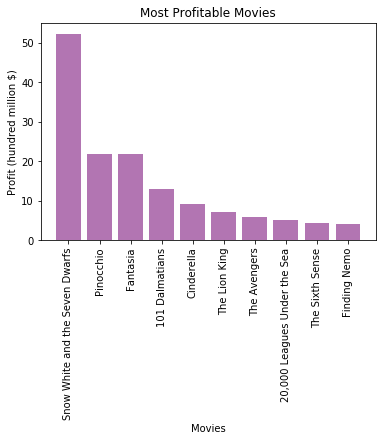

<Figure size 720x360 with 0 Axes>

In [28]:
profit = [52.27, 21.86, 21.85, 13.09, 9.18, 7.17, 6.0, 5.23, 4.45, 4.24]
index = ['Snow White and the Seven Dwarfs', 'Pinocchio', 'Fantasia', '101 Dalmatians', 'Cinderella', 'The Lion King', 
        'The Avengers', '20,000 Leagues Under the Sea', 'The Sixth Sense', 'Finding Nemo']
 
# Create bars and choose color
plt.bar(index, profit, color = (0.5,0.1,0.5,0.6))

# Add title and axis names
plt.title('Most Profitable Movies')
plt.xlabel('Movies')
plt.ylabel('Profit (hundred million $)')
 
# Limits for the Y axis
plt.ylim(0,55)
 
# Create names
plt.xticks(y_pos, index)
plt.xticks(rotation=90)
plt.figure(figsize=(10,5)) 

plt.savefig ('Images/fig2.png')

# Show chart
plt.show()



In [22]:
sort_by_profit = profit_df.sort_values('profit',ascending=True)
sort_by_profit.set_index("title", inplace=True)

sort_by_profit.head(20)

,profit
title,
John Carter,-182627555.0
The 13th Warrior,-105737852.0
Treasure Planet,-84810855.0
The Sorcerer's Apprentice,-82526895.0
Around the World in 80 Days,-77414644.0
The Chronicles of Narnia: Prince Caspian,-58722962.0
King Arthur,-49576294.0
Tangled,-45611452.0
The Insider,-42205786.0


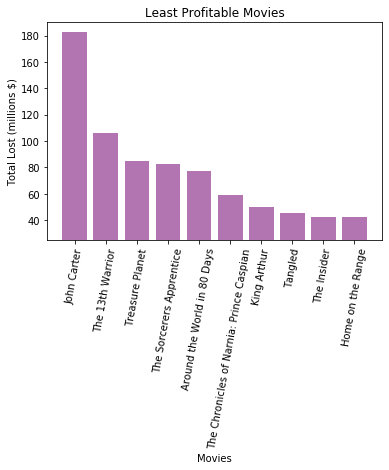

<Figure size 720x360 with 0 Axes>

In [27]:
profit = [182.63, 105.74, 84.81, 82.53, 77.41, 58.72, 49.58, 45.61, 42.21, 42.09]
index = ['John Carter', 'The 13th Warrior', 'Treasure Planet', 'The Sorcerers Apprentice', 'Around the World in 80 Days', 
         'The Chronicles of Narnia: Prince Caspian', 'King Arthur', 'Tangled', 'The Insider', 'Home on the Range']

 
# Create bars and choose color
plt.bar(index, profit, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Least Profitable Movies')
plt.xlabel('Movies')
plt.ylabel('Total Lost (millions $)')
 
# Limits for the Y axis
plt.ylim(25,190)
 
# Create names
plt.xticks(y_pos, index)
plt.xticks(rotation=80)
plt.figure(figsize=(10,5))  

plt.savefig ('Images/fig3.png')

# Show chart
plt.show()

